<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/BT_AI_W9_Fashion_mnist_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(x_train, y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
class_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
               5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

Anh: 2


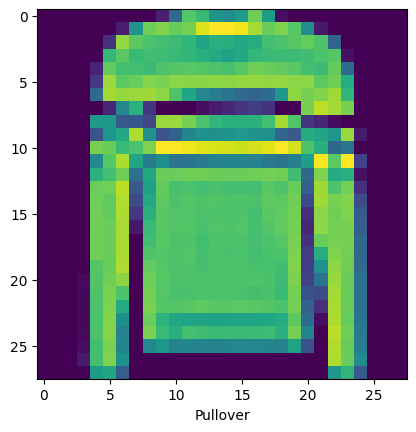

In [ ]:
digit=x_train[5]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
plt.xlabel(class_names[y_train[5]])
print('Anh:',y_train[5])

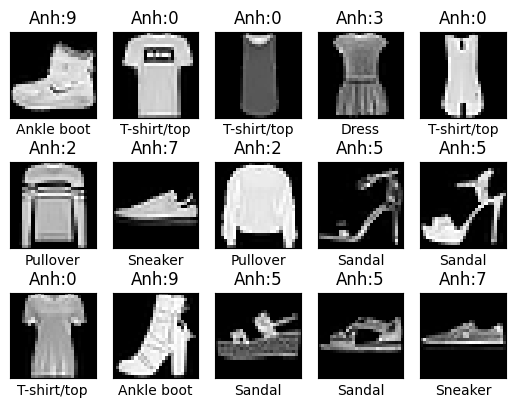

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray', 
             interpolation='none')
  plt.title('Anh:{}'.format(y_train[i])) 
  plt.xlabel(class_names[y_train[i]])
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 

model=Sequential() 
model.add(Dense(2048,activation='relu', input_shape=(28*28,)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 2048)              1607680   
                                                                 
 dense_14 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_15 (Dense)            (None, 10)                10250     
                                                                 
Total params: 3,716,106
Trainable params: 3,716,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train=x_train.reshape((60000,28*28))
x_train=x_train.astype('float32')/255
x_train.shape

(60000, 784)

In [ ]:
x_test=x_test.reshape((10000,28*28))
x_test=x_test.astype('float32')/255
x_test.shape

(10000, 784)

In [ ]:
from keras.utils import to_categorical
y_train= to_categorical(y_train,10)
y_train.shape 

(60000, 10)

In [ ]:
y_test= to_categorical(y_test,10)
y_test.shape 

(10000, 10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50,batch_size=128)
test_loss,test_acc= model.evaluate(x_test, y_test)
print('do mat mat:',test_loss)
print('do chinh xac:',test_acc)

Epoch 1/50
469/469 [==============================] - 46s 97ms/step - loss: 0.5740 - accuracy: 0.7926
Epoch 2/50
469/469 [==============================] - 46s 99ms/step - loss: 0.3765 - accuracy: 0.8600
Epoch 3/50
469/469 [==============================] - 44s 94ms/step - loss: 0.3345 - accuracy: 0.8754
Epoch 4/50
469/469 [==============================] - 45s 96ms/step - loss: 0.3052 - accuracy: 0.8857
Epoch 5/50
469/469 [==============================] - 45s 96ms/step - loss: 0.2863 - accuracy: 0.8925
Epoch 6/50
469/469 [==============================] - 46s 99ms/step - loss: 0.2724 - accuracy: 0.8978
Epoch 7/50
469/469 [==============================] - 45s 96ms/step - loss: 0.2587 - accuracy: 0.9019
Epoch 8/50
469/469 [==============================] - 46s 98ms/step - loss: 0.2470 - accuracy: 0.9063
Epoch 9/50
469/469 [==============================] - 44s 95ms/step - loss: 0.2400 - accuracy: 0.9093
Epoch 10/50
469/469 [==============================] - 45s 97ms/step - loss: 0.229

In [ ]:
model=load_model('Fashion_mnist.h5')

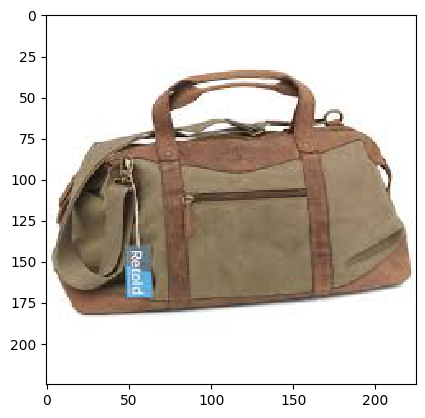

In [ ]:
from keras.saving.saving_api import load_model
model.save('Fashion_mnist.h5')
from keras.utils import load_img
url = '/content/bag.jpg'
img = load_img(url)
plt.imshow(img,cmap='gray',interpolation='none')

1/1 [==============================] - 0s 26ms/step
Anh nay la:  [8]


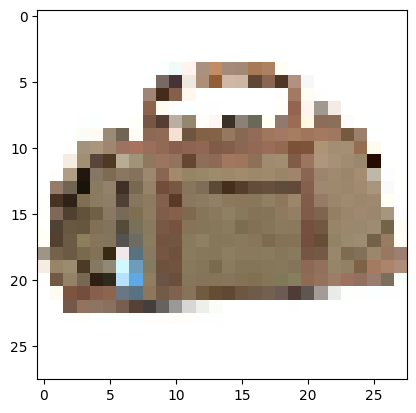

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (28,28))
plt.imshow(img)
img = img_to_array(img)
img = img[:,:,0]
img = img.reshape(1,28*28)
img = img.astype('float32')
img = img/255   
pred_value = np.argmax(model.predict(img),axis=1)
print('Anh nay la: ', pred_value)